Elias's Monte Carlo Pi Approximation project.



Using python, NumPy, and matplotlib, I have created a program to roughly estimate pi using the Monte Carlo method. This code utilizes a lot of for loops and stored arrays, as well as python's randomint function.

By specifying the size of a square, and fitting a unit circle inside it, randomly placing dots and dividing the dots inside of the circle by the total number of dots (as well as multiplying by 4) will give a rough estimation of pi. This calculation is done by using python's randomint function to give a x and y value within the square and then measuring the distance from the center. If this distance was less than the radius, it was counted as inside.

This estimation converges faster as you add more dots or increase the resolution (size) of the square. Calculations get intensive approaching 25,000,000 dots on a 5000 sized square, but at the current set rates, calculation shouldn't take more than 2.5 min.

Subroutine 1 allows the user to input a square size and number of dots to place on the square, then outputs the approximated value of pi. This was the first iteration of my program. It also handles higher numbers of dots better than either of the other subroutines, as there are no graphics or storage necessary, just pure input output.

Subroutine 2 allows the user to input a size for the square and a number of dots to place, then outputs an estimation of pi, as well as a visual graph of the dots placed and the circle and square. This is very resourse intensive so I recommend not surpassing 5,000 on the square size or 50,000 on the number of dots, although it will complete given enough time.

Subroutine 3 uses a fixed square size of 10,000 and incrementally calculates estimations of pi with numbers of dots, then outputs the results on a logarithmic graph. This allows you to see the convergance of the calculation. The graph is labeled by the number of dots in powers of 10 on the x-axis and the pi estimation on the y-axis. The graph also uses a python given value of pi to label the true accepted value of pi as a line.

I think I have used and approximated the Monte Carlo method very concisely, as well as graphing the convergance.
There is great variety and use in the code, and it helped me learn more about the documentation of Pymath, matplotlib, and Python.
There was some real trouble in trying to output the results of my for loops into an array or list to be graphed, but documentation scouring helped greatly.

In [9]:
#importing randomizer function
import random
inside = 0
#user input section
square=int(input("How big is the square?"))
total=int(input("How many dots?"))
radius=int((square)/2)
print("r="+str(radius))
#dot calculation and pi estimation
for dots in range(0,total):
    x = random.randint(-radius, radius)
    y = random.randint(-radius, radius)
    distance = (x**2+y**2)**0.5
    if distance <= radius:
        inside += 1
    continue
pi = 4*((inside/total))
print("Pi Estimation:" + str(pi))

How big is the square? 10000
How many dots? 10000000


r=5000
Pi Estimation:3.1414976


How big is the square? 1000
How many dots? 15000


r=500


<Figure size 640x480 with 0 Axes>

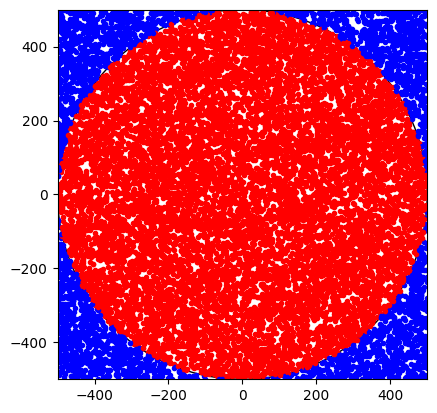

Pi Estimation:3.1418666666666666


In [10]:
#dependancies
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import random
inside = 0
#user input section
square=int(input("How big is the square?"))
total=int(input("How many dots?"))
radius=int((square)/2)
print("r="+str(radius))
#graph creation section (plt.ion() changes the graph to interactive, allowing the repeated placement of dots to update the graph)
plt.ion()
fig = plt.figure()
fig, ax = plt.subplots()
ax.set_xlim((-radius, radius))
ax.set_ylim((-radius, radius))
center = (0,0)
circle=Circle(center,radius, fill=False)
#setting axis equal so as to not distort circle
ax.set_aspect('equal')
#calculating dot placement
for dots in range(0,total):
    x = random.randint(-radius, radius)
    y = random.randint(-radius, radius)
    distance = (x**2+y**2)**0.5
    if distance <= radius:
        inside += 1
        plt.plot(x, y, '.', color='red')
    else:
        plt.plot(x, y, '.', color='blue')
    continue
#adding circle to graph and displaying
ax.add_patch(circle)
plt.show()
#calculate pi estimation and print
pi = 4*((inside/total))
print("Pi Estimation:" + str(pi))

[10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]
[4.0, 2.88, 2.96, 3.112, 3.172, 3.136, 3.1508, 3.14688, 3.13568, 3.142584, 3.141968, 3.1404088, 3.1410344]


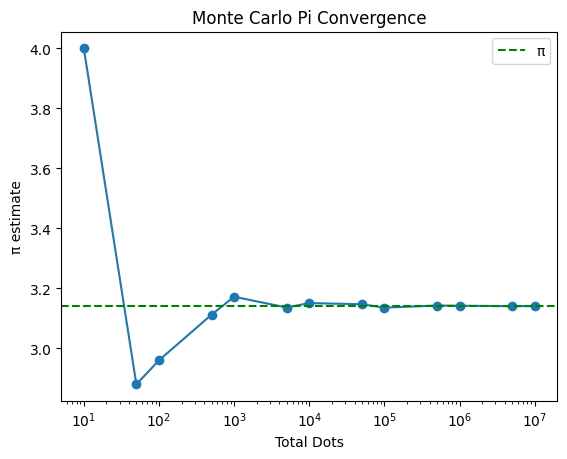

In [11]:
#dependencies
import random
import matplotlib.pyplot as plt
import numpy as np
#initilizing variables and arrays
inside = 0
pi=0
totals = []
pies = []
square = int(10000)
radius=int((square)/2)
#list of total dot numbers, feel free to adjust as wanted
for total in [10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000]:
    inside = 0
    x=0
    y=0
#for loop using numbers in list above
    for dots in range(0,total):
        x = random.randint(-radius, radius)
        y = random.randint(-radius, radius)
        distance = (x**2+y**2)**0.5
        if distance <= radius:
            inside += 1
        continue
    pi = 4*((inside/total))
#appending input and output of calcuation to arrays
    totals.append(total)
    pies.append(pi)
    continue
#printing array for data visualization
print(totals)
print(pies)
#graphing segment
fig, ax = plt.subplots()
ax.plot(totals, pies, 'o-')
ax.axhline(np.pi, color='g', linestyle='--', label='\u03C0')
ax.set_xscale('log')
ax.set_xlabel('Total Dots')
ax.set_ylabel('\u03C0 estimate')
ax.set_title('Monte Carlo Pi Convergence')
ax.legend()
plt.show()